In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import plotly.express as px
import seaborn as sns


# Q1 (35pts): Convert covariance matrix into correlation matrix using numpy

A. Briefly explain in 1-2 sentences the concepts of Covariance and Correlation, and
describe their relationship. You may use equations for clarification

Covariance is standard deviation (or variance) calculated for data consisting of two variables.

It allows for identification of relationships between them (for example whether increase in variable *y* is a good predictor of increase in variable *x* )

$$\frac{\sum (x_i - \bar{x})(y_i - \bar{y})}{N-1}$$

Equation for calculating covariance of a sample
Where:
    $$\bar{x}$$ is mean of variable x
    $$\bar{y}$$ is mean of variable y
    $$x_i$$ and $$y_i$$ are corresponding samples
    N is the number of samples

$$\frac{\sum (x_i - \mu_x)(y_i - \mu_y)}{N}$$
Equation for calculating covariance of a population. Sample means are replaced with population means and N is now a number of specimen in the populaion.

Covariance is sensitive to the scale of the data and can only tell us if the relationship exists and whether it is positive or negative.

To determine the strength of this relationship, we can further calculate correlation.

$$r_{xy} = \frac{\text{cov}(X, Y)}{\sigma_X \sigma_Y}$$

Equation for calculating correlation. Covariance of *x* and *y* is divided by the product of their standard deviations.

Correlation takes values between -1 and 1, with -1 signifying strong negative correlation, 1 - strong positive correlation and 0 - no correlation.

B. Load the Iris dataset, using any method of your choice (e.g.: pd.read_csv("iris.csv")
in Pandas).

Use visualization to explore the relationship between the different features.

In [2]:
# Loading and previewing dataset
iris = pd.read_csv("iris.csv")

iris.head(10)


,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
5,5.4,3.9,1.7,0.4,setosa
6,4.6,3.4,1.4,0.3,setosa
7,5.0,3.4,1.5,0.2,setosa
8,4.4,2.9,1.4,0.2,setosa
9,4.9,3.1,1.5,0.1,setosa


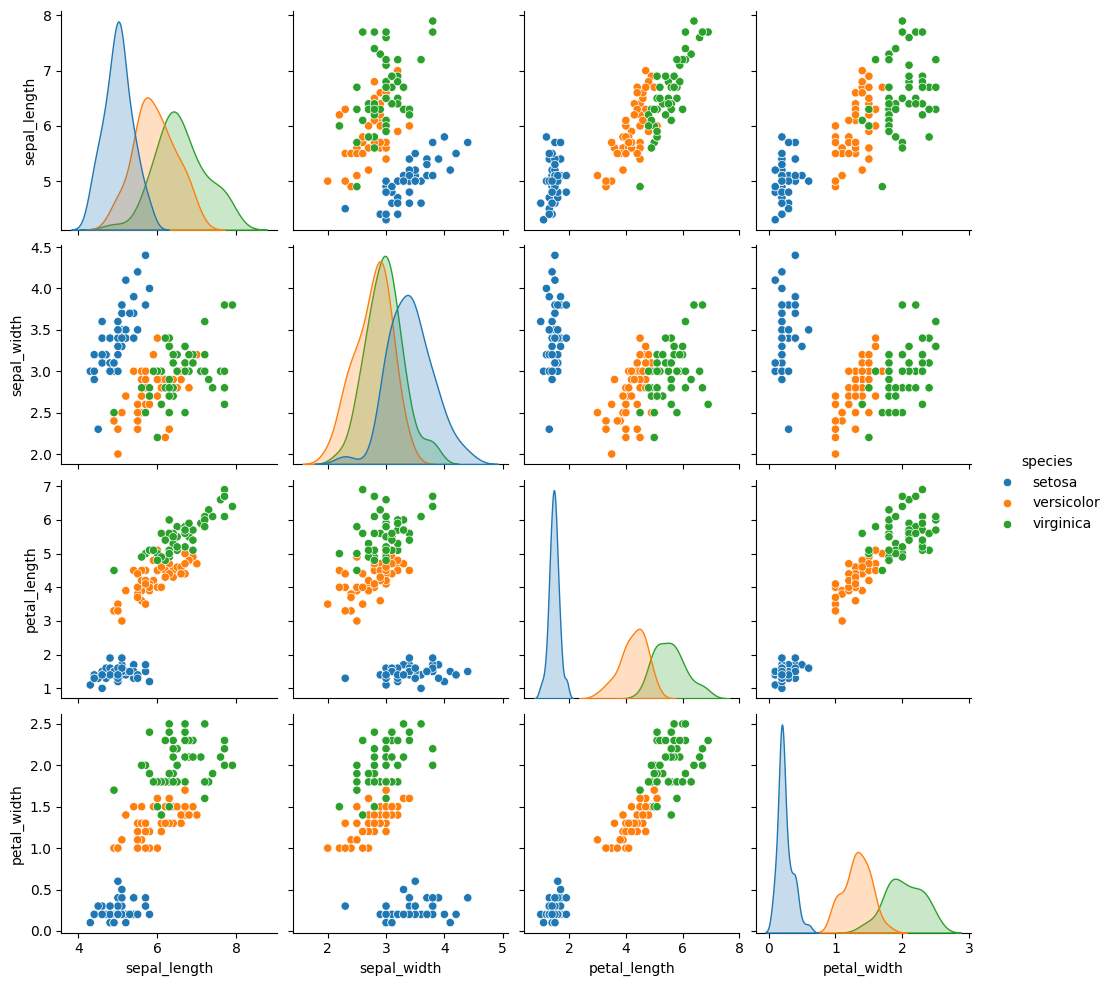

In [ ]:
# Visualising relationships
sns.pairplot(iris, hue='species', height=2.5)

C. Implement the following functions:

a. A function to calculate the covariance between two variables:

In [3]:
# Defining function for covariance calculation
def calcCov(x, y):

    mean_x = np.mean(x)
    mean_y = np.mean(y)

    sum = 0
    
    for sample in range(len(x)):
        sum += ((x[sample] - mean_x)*(y[sample] - mean_y))

    cov = sum/(len(x)-1)

    return cov


b. A function to compute the Covariance matrix:

covMat(data) should return an n by n covariance matrix, where n is the
number of features (in case of the iris dataset n=4)

In [4]:
# Defining function for covariance matrix calculation
def covMat(data):
    numerical = data.select_dtypes(include = np.number)

    matrix = np.zeros((len(numerical.columns), len(numerical.columns)))

    for column in range(len(numerical.columns)):
        for variable in range(len(numerical.columns)):
            matrix [column] [variable] = calcCov(numerical.iloc[:, column], numerical.iloc[:, variable])

    return matrix

D. Test1: compare the results of your function with NumPy's
np.cov(data,rowvar=False) using the iris dataset.

In [5]:
# Preserving numerical values from the dataset
numerical = iris.select_dtypes(include = np.number)

# Comparing results for my function vs numpy function
print(np.cov(numerical, rowvar=False))
print()
print(covMat(iris))



[[ 0.68569351 -0.03926846  1.27368233  0.5169038 ]
 [-0.03926846  0.18800403 -0.32171275 -0.11798121]
 [ 1.27368233 -0.32171275  3.11317942  1.29638747]
 [ 0.5169038  -0.11798121  1.29638747  0.58241432]]

[[ 0.68569351 -0.03926846  1.27368233  0.5169038 ]
 [-0.03926846  0.18800403 -0.32171275 -0.11798121]
 [ 1.27368233 -0.32171275  3.11317942  1.29638747]
 [ 0.5169038  -0.11798121  1.29638747  0.58241432]]


E. Using your covariance function, implement a function to calculate the correlation
matrix (should use covMat(data) and return the correlation matrix):

In [6]:
# Defining function for correlation matrix calculation
def corrMat(data):
    numerical = data.select_dtypes(include = np.number)
    cov_matrix = covMat(data)
    cor_matrix = cov_matrix

    std_list = []

    for column in numerical.columns:
        std_list.append(data[column].std())

    for row_idx in range(len(cov_matrix[0])):
        for column_idx in range(len(cov_matrix[0])):
            cor_matrix [row_idx] [column_idx] = cov_matrix [row_idx] [column_idx] / (std_list[row_idx] * std_list[column_idx])

    return cor_matrix

F. Test2: validate your correlation matrix implementation by comparing it with the
results of NumPy's np.corrcoef(data,rowvar=False), using the iris dataset.

In [7]:
# Preserving numerical values from the dataset
numerical = iris.select_dtypes(include = np.number)

# Comparing results for my function vs numpy function
print(np.corrcoef(numerical, rowvar=False))
print()
print(corrMat(iris))


[[ 1.         -0.10936925  0.87175416  0.81795363]
 [-0.10936925  1.         -0.4205161  -0.35654409]
 [ 0.87175416 -0.4205161   1.          0.9627571 ]
 [ 0.81795363 -0.35654409  0.9627571   1.        ]]

[[ 1.         -0.10936925  0.87175416  0.81795363]
 [-0.10936925  1.         -0.4205161  -0.35654409]
 [ 0.87175416 -0.4205161   1.          0.9627571 ]
 [ 0.81795363 -0.35654409  0.9627571   1.        ]]


G. Use visualizations to communicate the tests results. Include appropriate titles,
axis labels, and colorbars where relevant.

C:\Users\samue\AppData\Local\Temp\ipykernel_6136\234619817.py:7: UserWarning:

FigureCanvasAgg is non-interactive, and thus cannot be shown



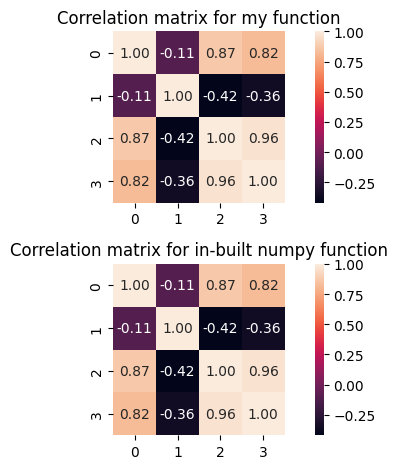

In [55]:
# Plotting test results for correlation matrix calculation
fig, (ax1, ax2) = plt.subplots(2,1)
sns.heatmap(corrMat(iris),square=True, annot=True, fmt='.2f', annot_kws={'size': 10}, ax=ax1,)
sns.heatmap(np.corrcoef(numerical, rowvar=False), square=True, annot=True, fmt='.2f', annot_kws={'size': 10}, ax=ax2)
ax1.set_title("Correlation matrix for my function")
ax2.set_title("Correlation matrix for in-built numpy function")
fig.tight_layout()
fig.show()

C:\Users\samue\AppData\Local\Temp\ipykernel_6136\904331226.py:8: UserWarning:

FigureCanvasAgg is non-interactive, and thus cannot be shown



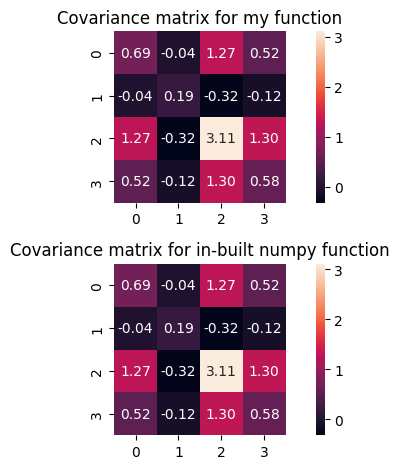

In [57]:
# Plotting test results for covariance matrix calculation
fig, (ax1, ax2) = plt.subplots(2,1)
sns.heatmap(covMat(iris),square=True, annot=True, fmt='.2f', annot_kws={'size': 10}, ax=ax1,)
sns.heatmap(np.cov(numerical, rowvar=False), square=True, annot=True, fmt='.2f', annot_kws={'size': 10}, ax=ax2)
ax1.set_title("Covariance matrix for my function")
ax2.set_title("Covariance matrix for in-built numpy function")
fig.tight_layout()
fig.show()

# Q2 (50pts): For this question you will use the dataset titled “laptop-price – dataset.csv”.

Import the libraries mentioned above and import the dataset from your filesystem into the
code.

In [49]:
laptops = pd.read_csv("laptop_price - dataset.csv")

laptops.head(10)

,Company,Product,TypeName,Inches,ScreenResolution,CPU_Company,CPU_Type,CPU_Frequency (GHz),RAM (GB),Memory,GPU_Company,GPU_Type,OpSys,Weight (kg),Price (Euro)
0,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel,Core i5,2.3,8,128GB SSD,Intel,Iris Plus Graphics 640,macOS,1.37,1339.69
1,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel,Core i5,1.8,8,128GB Flash Storage,Intel,HD Graphics 6000,macOS,1.34,898.94
2,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel,Core i5 7200U,2.5,8,256GB SSD,Intel,HD Graphics 620,No OS,1.86,575.00
3,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel,Core i7,2.7,16,512GB SSD,AMD,Radeon Pro 455,macOS,1.83,2537.45
4,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel,Core i5,3.1,8,256GB SSD,Intel,Iris Plus Graphics 650,macOS,1.37,1803.60
5,Acer,Aspire 3,Notebook,15.6,1366x768,AMD,A9-Series 9420,3.0,4,500GB HDD,AMD,Radeon R5,Windows 10,2.10,400.00
6,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel,Core i7,2.2,16,256GB Flash Storage,Intel,Iris Pro Graphics,Mac OS X,2.04,2139.97
7,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel,Core i5,1.8,8,256GB Flash Storage,Intel,HD Graphics 6000,macOS,1.34,1158.70
8,Asus,ZenBook UX430UN,Ultrabook,14.0,Full HD 1920x1080,Intel,Core i7 8550U,1.8,16,512GB SSD,Nvidia,GeForce MX150,Windows 10,1.30,1495.00
9,Acer,Swift 3,Ultrabook,14.0,IPS Panel Full HD 1920x1080,Intel,Core i5 8250U,1.6,8,256GB SSD,Intel,UHD Graphics 620,Windows 10,1.60,770.00


Please write code to complete the following tasks with this dataset:

• Plot the price of all the laptops

In [30]:
fig = px.scatter(laptops, x='Company', y='Price (Euro)', color='Company',
                 size='Price (Euro)', hover_data=['Product', 'Price (Euro)'],
                 title='Scatter Plot of individual product prices by producer')

fig.show()

• Which company has on average the most expensive laptop? What is the average
laptop price for each company?

In [59]:
# Getting a dataframe consisting of names of the companies and average prices of their products
average_prices = laptops.groupby("Company", as_index=False)['Price (Euro)'].mean()
average_prices.rename(columns={'Price (Euro)': 'Average Price'}, inplace=True)



,Company,Average Price
0,Acer,633.464455
1,Apple,1564.198571
2,Asus,1123.829737
3,Chuwi,314.296667
4,Dell,1199.225120
5,Fujitsu,729.000000
6,Google,1677.666667
7,HP,1080.314664
8,Huawei,1424.000000
9,LG,2099.000000


In [89]:
fig = px.bar(average_prices, x="Company", y="Average Price", color="Company", title="Average product price by producer")
fig.update_layout(xaxis = {"categoryorder":"total ascending"})
fig.show()

• Find the different types of Operating systems present in the data - under the column
name "OpSys".

o Please note - there are operating systems that are the same systems and just
written differently in the column - please fix them to be uniform.

In [45]:
# Checking unique names of operating systems in the dataset
laptops["OpSys"].unique()

array(['macOS', 'No OS', 'Windows 10', 'Mac OS X', 'Linux', 'Android',
       'Windows 10 S', 'Chrome OS', 'Windows 7'], dtype=object)

In [50]:
# Standardizing OS names
def categorize_os(system):
    system = system.lower()
    if 'windows' in system:
        return 'Windows'
    elif 'mac' in system or 'os x' in system:
        return 'Mac'
    elif 'linux' in system:
        return 'Linux'
    elif 'chrome' in system:
        return 'Chrome OS'
    elif 'android' in system:
        return 'Android'
    else:
        return 'Other'
    
laptops["OpSys"] = laptops["OpSys"].apply(categorize_os)

In [58]:
# Confirming standarization effectiveness
laptops["OpSys"].unique()

array(['Mac', 'Other', 'Windows', 'Linux', 'Android', 'Chrome OS'],
      dtype=object)

• Plot for each of the operating system types the distribution of the prices, so that the
number of plots equals to the number of unique operating systems.

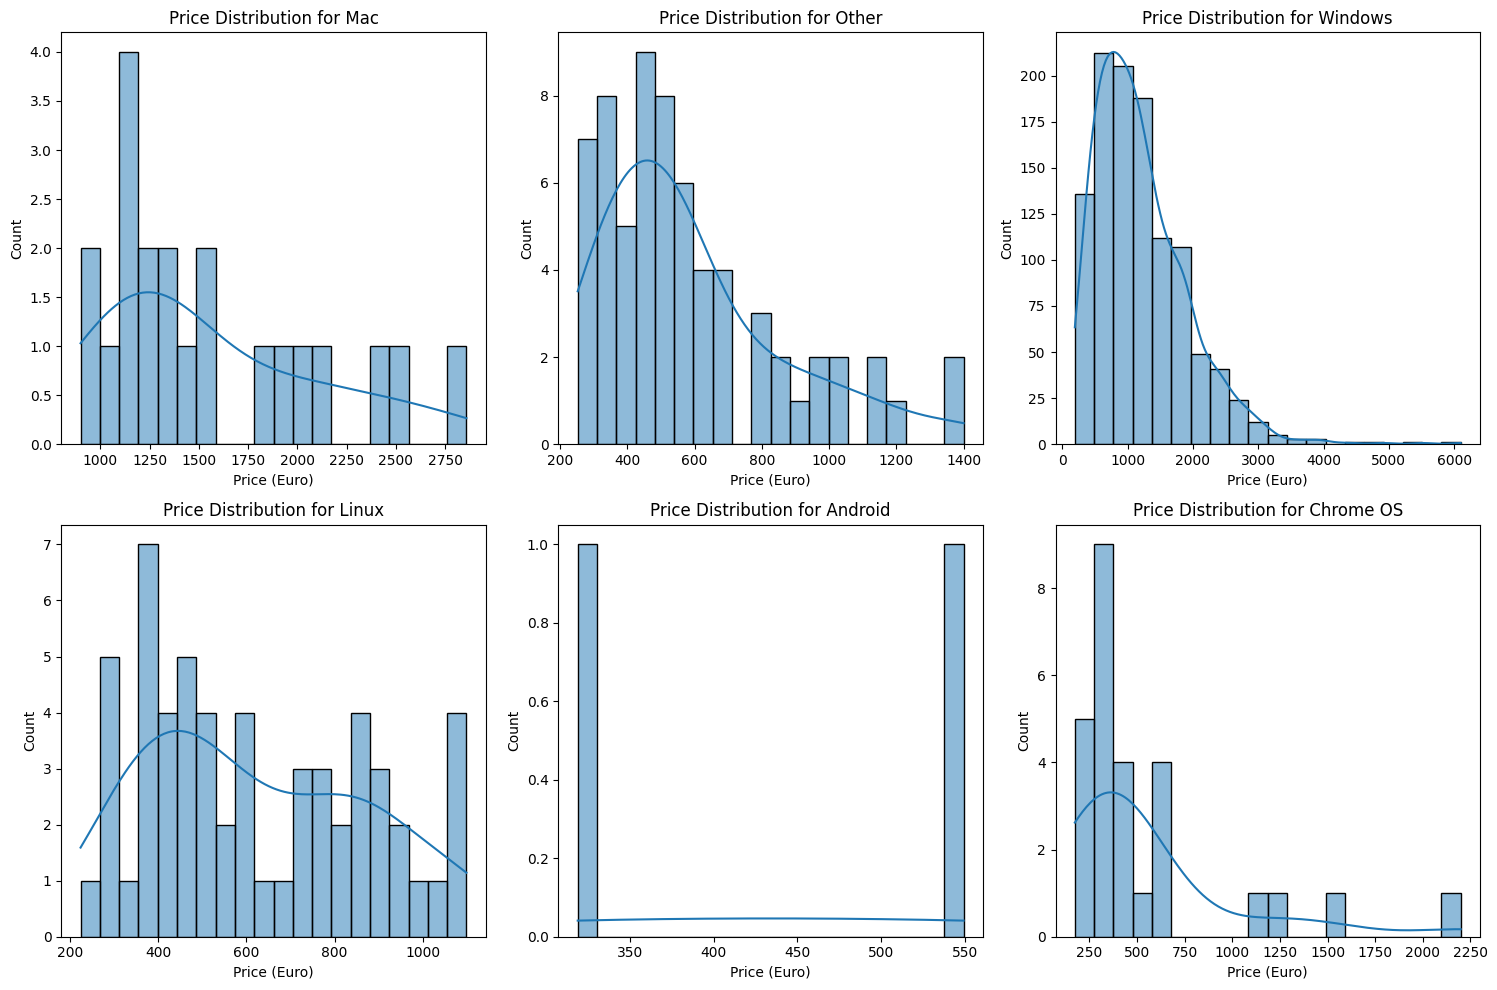

In [ ]:
plt.figure(figsize=(15, 10))
for i, os in enumerate(laptops["OpSys"].unique(), start=1):
    plt.subplot(2, (len(laptops["OpSys"].unique()) + 1) // 2, i)  # Adjust layout for readability
    sns.histplot(laptops[laptops["OpSys"] == os]["Price (Euro)"], kde=True, bins=20)
    plt.title(f"Price Distribution for {os}")
    plt.xlabel("Price (Euro)")
    plt.ylabel("Count")


plt.tight_layout()
plt.show()

• What is the relationship between RAM and computer price? add an adequate plot to
support your findings.

In [77]:
# Getting a dataframe consisting of names of the RAM ammounts and associated average price
average_prices_by_ram = laptops.groupby('RAM (GB)')['Price (Euro)'].mean().reset_index()

average_prices_by_ram

,RAM (GB),Price (Euro)
0,2,247.634375
1,4,576.109101
2,6,619.356571
3,8,1184.429413
4,12,1239.438400
5,16,1941.193081
6,24,2206.333333
7,32,3413.085882
8,64,3975.000000


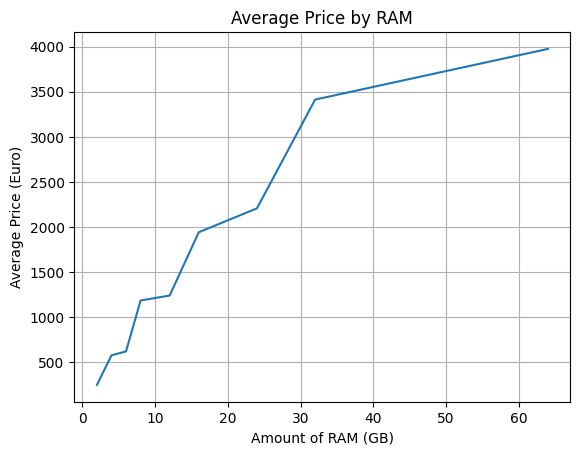

In [94]:
# Plotting relationship between the amount of RAM and price
plt.figure()
sns.lineplot(data=average_prices_by_ram, x='RAM (GB)', y='Price (Euro)')
plt.title('Average Price by RAM')
plt.xlabel('Amount of RAM (GB)')
plt.ylabel('Average Price (Euro)')
plt.grid(True)
plt.show()

• Create a new column for the dataframe called "Storage type" that extracts the
storage type from the column "Memory".

o For example, in the first row in the column "Memory" it states "128GB SSD",
the new column will have just "SSD" in its first row.

In [83]:
# Creating a list for entries
storage_type = []

# Assigning values based on the contents of the "Memory" column
for storage in laptops["Memory"]:
    storage = storage.lower()
    if 'hdd' in storage and 'ssd' in storage:
        storage_type.append("HDD & SSD")
    elif 'ssd' in storage:
        storage_type.append("SSD")
    elif 'hdd' in storage:
        storage_type.append("HDD")
    elif 'flash' in storage:
        storage_type.append("Flash storage")
    else:
        storage_type.append("Other")

# Initializing new column with values from the list
laptops["Storage type"] = storage_type

In [86]:
# Checking implementation
laptops.head(10)

,Company,Product,TypeName,Inches,ScreenResolution,CPU_Company,CPU_Type,CPU_Frequency (GHz),RAM (GB),Memory,GPU_Company,GPU_Type,OpSys,Weight (kg),Price (Euro),Storage type
0,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel,Core i5,2.3,8,128GB SSD,Intel,Iris Plus Graphics 640,Mac,1.37,1339.69,SSD
1,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel,Core i5,1.8,8,128GB Flash Storage,Intel,HD Graphics 6000,Mac,1.34,898.94,Flash storage
2,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel,Core i5 7200U,2.5,8,256GB SSD,Intel,HD Graphics 620,Other,1.86,575.00,SSD
3,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel,Core i7,2.7,16,512GB SSD,AMD,Radeon Pro 455,Mac,1.83,2537.45,SSD
4,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel,Core i5,3.1,8,256GB SSD,Intel,Iris Plus Graphics 650,Mac,1.37,1803.60,SSD
5,Acer,Aspire 3,Notebook,15.6,1366x768,AMD,A9-Series 9420,3.0,4,500GB HDD,AMD,Radeon R5,Windows,2.10,400.00,HDD
6,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel,Core i7,2.2,16,256GB Flash Storage,Intel,Iris Pro Graphics,Mac,2.04,2139.97,Flash storage
7,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel,Core i5,1.8,8,256GB Flash Storage,Intel,HD Graphics 6000,Mac,1.34,1158.70,Flash storage
8,Asus,ZenBook UX430UN,Ultrabook,14.0,Full HD 1920x1080,Intel,Core i7 8550U,1.8,16,512GB SSD,Nvidia,GeForce MX150,Windows,1.30,1495.00,SSD
9,Acer,Swift 3,Ultrabook,14.0,IPS Panel Full HD 1920x1080,Intel,Core i5 8250U,1.6,8,256GB SSD,Intel,UHD Graphics 620,Windows,1.60,770.00,SSD


# Q3 (15pts): Think of additional questions related to this data. 

What types of analyses and visualizations would you use to address them? Select two questions from your list and
implement. Submit your list of questions, suggested analyses and visualizations and the
implementation.

Exemplary questions:

    - what is the popularity of each type of laptop (among the producers)?
    - what is the average amount of RAM for each type of laptop?
    - is there correlation between numerical desriptors of the laptops?

What is the average amount of RAM for each type of laptop?

In [90]:
# Getting a dataframe consisting of types of devices and their average amount of RAM
average_ram = laptops.groupby("TypeName", as_index=False)['RAM (GB)'].mean()
average_ram.rename(columns={'RAM (GB)': 'Average RAM'}, inplace=True)

average_ram

,TypeName,Average RAM
0,2 in 1 Convertible,8.615385
1,Gaming,14.048780
2,Netbook,4.869565
3,Notebook,6.540311
4,Ultrabook,9.453608
5,Workstation,10.482759


In [91]:
# Plotting graph of average RAM amount by type of device
fig = px.bar(average_ram, x="TypeName", y="Average RAM", color="TypeName", title="Average amount of RAM by device type")
fig.update_layout(xaxis = {"categoryorder":"total ascending"})
fig.show()

Unsurprisingly, gaming laptops have the highest average amount of RAM.

Convertible devices display surprising adventage over notebooks and netbooks.

Is there correlation between numerical desriptors of the laptops?

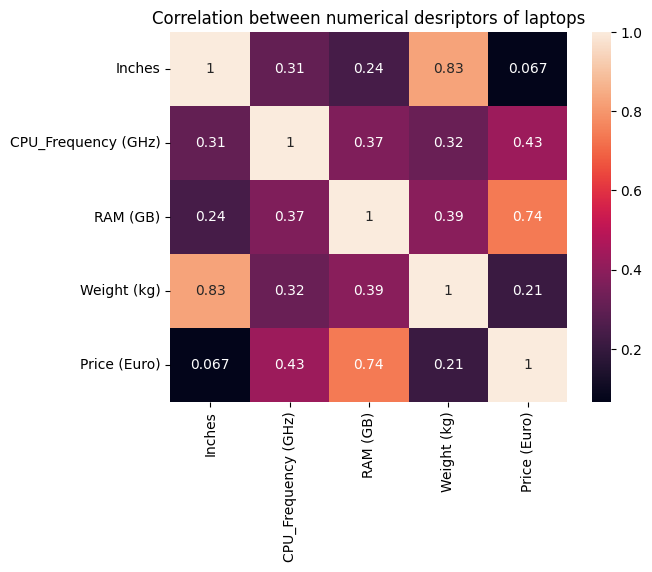

In [93]:
ax = plt.axes()
sns.heatmap(laptops.corr(numeric_only=True), annot=True)
ax.set_title("Correlation between numerical desriptors of laptops")
plt.show()

Although all descriptors show some positive correlation with the price of the device, the screen diagonal seems to be the poorest predictor of the price.

On the other hand, the amount of RAM seems to be a good indicator of the price, with CPU frequency as a decent second option.